In [110]:
#### Part 01 of learning KNN. Check knn102 for next part ####

# I will train the Iris dataset using the K-Nearest Neighbors (KNN) algorithm with three different values for the number of neighbors: 1, 3, and 5.
# I will consider two flower classes at a time:
#     1. Setosa and Versicolor
#     2. Versicolor and Virginica
#     3. Setosa and Virginica
# For each pair of classes, I will perform training and evaluation using both 70/30 and 80/20 train-test splits.
# This will result in a total of 3 (neighbor values) * 3 (class combinations) * 2 (splits) = 18 different models.
# For each model, I will calculate the True Skill Statistic (TSS) to evaluate its performance.

# I am applying N-fold cross-validation with n = 2, 3, and 10 to the least performance model.
# Additionally, I will perform Leave-One-Out (LOO) cross-validation for all three flower class combinations:
#     1. Setosa and Versicolor
#     2. Versicolor and Virginica
#     3. Setosa and Virginica

In [252]:
import sys
print("Python version:", sys.version)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import platform
print("Operating System:", platform.system())
print("OS version:", platform.version())
print("Processor:", platform.processor())

Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
scikit-learn version: 1.5.1
Operating System: Darwin
OS version: Darwin Kernel Version 22.6.0: Wed Jul  5 22:21:53 PDT 2023; root:xnu-8796.141.3~6/RELEASE_ARM64_T6020
Processor: arm


In [254]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [256]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [258]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [260]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [262]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [264]:
df.shape

(150, 4)

In [266]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [268]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [270]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [272]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [30]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [32]:
df[95:105]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [34]:
df_setosa = df[:50]
df_versicolor = df[50:100]
df_virginica = df[100:]

# Prepare datasets containing two flower classes at a time, as the model will be trained for binary classification (2 classes at a time)

df_setosa_and_versicolor = df[:100]
df_versicolor_and_virginica = df[50:150]
df_setosa_and_virginica = pd.concat([df[:50], df[100:]], axis=0)

In [36]:
df_setosa_and_virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [38]:
df_setosa['sepal width (cm)']

0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    3.0
13    3.0
14    4.0
15    4.4
16    3.9
17    3.5
18    3.8
19    3.8
20    3.4
21    3.7
22    3.6
23    3.3
24    3.4
25    3.0
26    3.4
27    3.5
28    3.4
29    3.2
30    3.1
31    3.4
32    4.1
33    4.2
34    3.1
35    3.2
36    3.5
37    3.6
38    3.0
39    3.4
40    3.5
41    2.3
42    3.2
43    3.5
44    3.8
45    3.0
46    3.8
47    3.2
48    3.7
49    3.3
Name: sepal width (cm), dtype: float64

In [40]:
import matplotlib.pyplot as plt

In [41]:
# Sepal length vs Sepal width (Setosa vs Vericolor)

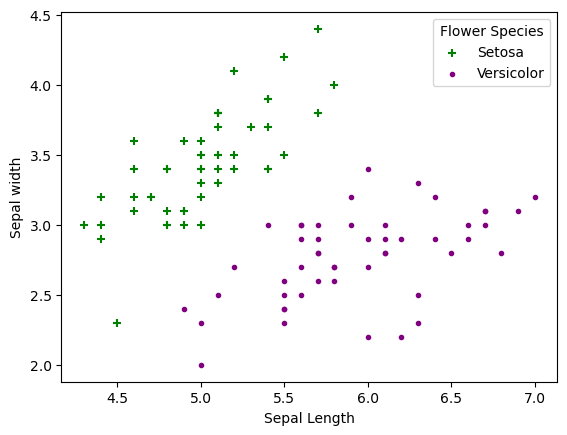

In [209]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color = "green", marker = "+", label = "Setosa")
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color = "purple", marker = ".", label="Versicolor")
plt.legend(loc="best", title='Flower Species')
plt.show()

In [43]:
# Petal length vs Petal width (Setosa vs Versicolor)

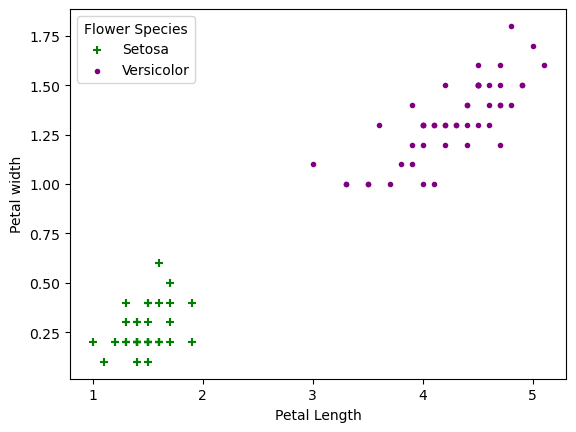

In [207]:
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], color = "green", marker = "+", label = "Setosa")
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], color = "purple", marker = ".", label="Versicolor")
plt.legend(loc="best", title='Flower Species')
plt.show()

In [49]:
# For Setosa Vs Versicolor    

In [51]:
# For Setosa Vs Versicolor    
    # K = 1
        # 70/30

from sklearn.model_selection import train_test_split
X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_versicolor.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [54]:
len(X_train)

70

In [56]:
len(X_test)

30

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.score(X_test, Y_test)

1.0

In [62]:
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

In [64]:
# Method to calculate, TSS
# TSS = ((TP * TN) - (FP * FN))/((TP + FN)*(TN+FP))
def calculateTSS(array):
    true_positive = array[0][0]
    false_positive = array[0][1]
    false_negative = array[1][0]
    true_negative = array[1][1]

    number_of_positives = true_positive + false_negative
    number_of_negatives = true_negative + false_positive

    return ((true_positive * true_negative) - (false_positive * false_negative)) / (number_of_positives * number_of_negatives)
    

In [66]:
calculateTSS(conf_matrix)

1.0

In [68]:
# For Setosa Vs Versicolor    
    # K = 1
        # 80/20

from sklearn.model_selection import train_test_split
X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_versicolor.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Versicolor, k = 1 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Versicolor, k = 1 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Versicolor, k = 1 and 80/20 splits is:  1.0
TSS for Setosa Vs Versicolor, k = 1 and 80/20 splits is:  1.0


In [70]:
# For Setosa Vs Versicolor    
    # K = 3
        # 70/30

from sklearn.model_selection import train_test_split
X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_versicolor.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Versicolor, k = 3 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Versicolor, k = 3 and 70/30 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Versicolor, k = 3 and 70/30 splits is:  1.0
TSS for Setosa Vs Versicolor, k = 3 and 70/30 splits is:  1.0


In [72]:
# For Setosa Vs Versicolor    
    # K = 3
        # 80/20

from sklearn.model_selection import train_test_split
X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_versicolor.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Versicolor, k = 3 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Versicolor, k = 3 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Versicolor, k = 3 and 80/20 splits is:  1.0
TSS for Setosa Vs Versicolor, k = 3 and 80/20 splits is:  1.0


In [284]:
# For Setosa Vs Versicolor    
    # K = 5
        # 70/30

from sklearn.model_selection import train_test_split
X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_versicolor.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

print(X_train.shape)
print(X_test.shape)

print("Accuracy for Setosa Vs Versicolor, k = 5 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Versicolor, k = 5 and 70/30 splits is: ", calculateTSS(conf_matrix))

(70, 4)
(30, 4)
Accuracy for Setosa Vs Versicolor, k = 5 and 70/30 splits is:  1.0
TSS for Setosa Vs Versicolor, k = 5 and 70/30 splits is:  1.0


In [76]:
# For Setosa Vs Versicolor    
    # K = 5
        # 80/20

from sklearn.model_selection import train_test_split
X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_versicolor.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Versicolor, k = 5 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Versicolor, k = 5 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Versicolor, k = 5 and 80/20 splits is:  1.0
TSS for Setosa Vs Versicolor, k = 5 and 80/20 splits is:  1.0


In [78]:
# For Versicolor Vs Virginica    
    # K = 1
        # 70/30

from sklearn.model_selection import train_test_split
X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)

print("Accuracy for Versicolor Vs Virginica, k = 1 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Versicolor Vs Virginica, k = 1 and 70/30 splits is: ", calculateTSS(conf_matrix))

Accuracy for Versicolor Vs Virginica, k = 1 and 70/30 splits is:  0.9333333333333333
TSS for Versicolor Vs Virginica, k = 1 and 70/30 splits is:  0.8660714285714286


In [80]:
# For Versicolor Vs Virginica    
    # K = 1
        # 80/20

from sklearn.model_selection import train_test_split
X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)

print("Accuracy for Versicolor Vs Virginica, k = 1 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Versicolor Vs Virginica, k = 1 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Versicolor Vs Virginica, k = 1 and 80/20 splits is:  0.95
TSS for Versicolor Vs Virginica, k = 1 and 80/20 splits is:  0.9230769230769231


In [82]:
# For Versicolor Vs Virginica    
    # K = 3
        # 70/30

from sklearn.model_selection import train_test_split
X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

print("Accuracy for Versicolor Vs Virginica, k = 3 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Versicolor Vs Virginica, k = 3 and 70/30 splits is: ", calculateTSS(conf_matrix))

Accuracy for Versicolor Vs Virginica, k = 3 and 70/30 splits is:  0.9666666666666667
TSS for Versicolor Vs Virginica, k = 3 and 70/30 splits is:  0.9444444444444444


In [250]:
# For Versicolor Vs Virginica    
    # K = 3
        # 80/20

from sklearn.model_selection import train_test_split
X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

print("Accuracy for Versicolor Vs Virginica, k = 3 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Versicolor Vs Virginica, k = 3 and 80/20 splits is: ", calculateTSS(conf_matrix))

Y_train

Accuracy for Versicolor Vs Virginica, k = 3 and 80/20 splits is:  1.0
TSS for Versicolor Vs Virginica, k = 3 and 80/20 splits is:  1.0


66     1
55     1
135    2
72     1
64     1
      ..
101    2
103    2
67     1
111    2
113    2
Name: target, Length: 80, dtype: int64

In [246]:
# For Versicolor Vs Virginica    
    # K = 5
        # 70/30

from sklearn.model_selection import train_test_split
X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

print("Accuracy for Versicolor Vs Virginica, k = 5 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Versicolor Vs Virginica, k = 5 and 70/30 splits is: ", calculateTSS(conf_matrix))

Accuracy for Versicolor Vs Virginica, k = 5 and 70/30 splits is:  0.9666666666666667
TSS for Versicolor Vs Virginica, k = 5 and 70/30 splits is:  0.9411764705882353


In [88]:
# For Versicolor Vs Virginica    
    # K = 5
        # 80/20

from sklearn.model_selection import train_test_split
X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

print("Accuracy for Versicolor Vs Virginica, k = 5 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Versicolor Vs Virginica, k = 5 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Versicolor Vs Virginica, k = 5 and 80/20 splits is:  0.9
TSS for Versicolor Vs Virginica, k = 5 and 80/20 splits is:  0.797979797979798


In [90]:
# For Setosa Vs Virginica    
    # K = 1
        # 70/30

from sklearn.model_selection import train_test_split
X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Virginica, k = 1 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Virginica, k = 1 and 70/30 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Virginica, k = 1 and 70/30 splits is:  1.0
TSS for Setosa Vs Virginica, k = 1 and 70/30 splits is:  1.0


In [92]:
# For Setosa Vs Virginica    
    # K = 1
        # 80/20

from sklearn.model_selection import train_test_split
X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Virginica, k = 1 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Virginica, k = 1 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Virginica, k = 1 and 80/20 splits is:  1.0
TSS for Setosa Vs Virginica, k = 1 and 80/20 splits is:  1.0


In [94]:
# For Setosa Vs Virginica    
    # K = 3
        # 70/30

from sklearn.model_selection import train_test_split
X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Virginica, k = 3 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Virginica, k = 3 and 70/30 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Virginica, k = 3 and 70/30 splits is:  1.0
TSS for Setosa Vs Virginica, k = 3 and 70/30 splits is:  1.0


In [96]:
# For Setosa Vs Virginica    
    # K = 3
        # 80/20

from sklearn.model_selection import train_test_split
X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Virginica, k = 3 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Virginica, k = 3 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Virginica, k = 3 and 80/20 splits is:  1.0
TSS for Setosa Vs Virginica, k = 3 and 80/20 splits is:  1.0


In [98]:
# For Setosa Vs Virginica    
    # K = 5
        # 70/30

from sklearn.model_selection import train_test_split
X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Virginica, k = 5 and 70/30 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Virginica, k = 5 and 70/30 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Virginica, k = 5 and 70/30 splits is:  1.0
TSS for Setosa Vs Virginica, k = 5 and 70/30 splits is:  1.0


In [100]:
# For Setosa Vs Virginica    
    # K = 5
        # 80/20

from sklearn.model_selection import train_test_split
X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_setosa_and_virginica.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

print("Accuracy for Setosa Vs Virginica, k = 5 and 80/20 splits is: ", knn.score(X_test, Y_test))

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

print("TSS for Setosa Vs Virginica, k = 5 and 80/20 splits is: ", calculateTSS(conf_matrix))

Accuracy for Setosa Vs Virginica, k = 5 and 80/20 splits is:  1.0
TSS for Setosa Vs Virginica, k = 5 and 80/20 splits is:  1.0


In [102]:
# For Second Part, for KFold we will choose Versicolor Vs Virginica.

In [104]:
# For Second Part, for KFold we will choose Versicolor Vs Virginica.
# Versicolor Vs Virginica, 
    # folds = 2

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

folds = StratifiedKFold(n_splits = 2)

accuracy = []
tss = []

X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

for train_index, test_index in folds.split(X, Y):
    # Use .iloc for numerical indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

    accuracy.append(knn.score(X_test, Y_test))
    tss.append(calculateTSS(conf_matrix))

print ("Mean Accuracy: ", sum(accuracy) / len(accuracy))
print ("Mean TSS: ", sum(tss) / len(tss))


Mean Accuracy:  0.9099999999999999
Mean TSS:  0.8231527932614888


In [106]:
# For Second Part, for KFold we will choose Versicolor Vs Virginica.
# Versicolor Vs Virginica, 
    # folds = 3

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

folds = StratifiedKFold(n_splits = 3)

accuracy = []
tss = []

X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

for train_index, test_index in folds.split(X, Y):
    # Use .iloc for numerical indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

    accuracy.append(knn.score(X_test, Y_test))
    tss.append(calculateTSS(conf_matrix))

print ("Mean Accuracy: ", sum(accuracy) / len(accuracy))
print ("Mean TSS: ", sum(tss) / len(tss))


Mean Accuracy:  0.9699940582293524
Mean TSS:  0.9444444444444443


In [274]:
# For Second Part, for KFold we will choose Versicolor Vs Virginica.
# Versicolor Vs Virginica, 
    # folds = 10

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

folds = StratifiedKFold(n_splits = 10)

accuracy = []
tss = []

X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis = 'columns')
Y = df_versicolor_and_virginica.target

for train_index, test_index in folds.split(X, Y):
    # Use .iloc for numerical indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

    print(conf_matrix)


    accuracy.append(knn.score(X_test, Y_test))
    tss.append(calculateTSS(conf_matrix))

print ("Mean Accuracy: ", sum(accuracy) / len(accuracy))
print ("Mean TSS: ", sum(tss) / len(tss))


[[5 0]
 [0 5]]
[[5 0]
 [1 4]]
[[5 0]
 [0 5]]
[[5 0]
 [0 5]]
[[3 2]
 [0 5]]
[[4 1]
 [0 5]]
[[4 1]
 [0 5]]
[[5 0]
 [0 5]]
[[5 0]
 [0 5]]
[[5 0]
 [0 5]]
Mean Accuracy:  0.95
Mean TSS:  0.9214285714285714


In [278]:
Y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 100, dtype: int64

In [110]:
# LOO validation
# For Setosa vs Versicolor

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Leave-One-Out cross-validation
loo = LeaveOneOut()

accuracy = []

X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis='columns')
Y = df_setosa_and_versicolor['target']

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)

    # Cannot computer TSS, because conf_matrix only accounts for one sample at a time for LOO, 
    # so, depending on true lable of test sample, one row or one column in confusion matrix can remain entirely zero,
    # So, the dividing by zeroo occurs in TSS 
    conf_matrix = confusion_matrix(Y_test, Y_pred, labels=knn.classes_)  # labels ensure consistency in TSS

    # print(conf_matrix)
    
    accuracy.append(knn.score(X_test, Y_test))

print("LOO test, Mean Accuracy for Setosa vs Versicolor: ", sum(accuracy) / len(accuracy))


LOO test, Mean Accuracy for Setosa vs Versicolor:  1.0


In [111]:
# LOO validation
# For Versicolor vs Virginica

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Leave-One-Out cross-validation
loo = LeaveOneOut()

accuracy = []

X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis='columns')
Y = df_versicolor_and_virginica['target']

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)

    # Cannot computer TSS, because conf_matrix only accounts for one sample at a time for LOO, 
    # so, depending on true lable of test sample, one row or one column in confusion matrix can remain entirely zero,
    # So, the dividing by zeroo occurs in TSS 
    conf_matrix = confusion_matrix(Y_test, Y_pred, labels=knn.classes_)  # labels ensure consistency in TSS

    # print(conf_matrix)
    
    accuracy.append(knn.score(X_test, Y_test))

print("LOO test, Mean Accuracy for Versicolor vs Virginica :", sum(accuracy) / len(accuracy))


LOO test, Mean Accuracy for Versicolor vs Virginica : 0.95


In [112]:
# LOO validation
# For Setosa vs Virginica

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Leave-One-Out cross-validation
loo = LeaveOneOut()

accuracy = []

X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis='columns')
Y = df_setosa_and_virginica['target']

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)

    # Cannot computer TSS, because conf_matrix only accounts for one sample at a time for LOO, 
    # so, depending on true lable of test sample, one row or one column in confusion matrix can remain entirely zero,
    # So, the dividing by zeroo occurs in TSS 
    conf_matrix = confusion_matrix(Y_test, Y_pred, labels=knn.classes_)  # labels ensure consistency in TSS

    # print(conf_matrix)
    
    accuracy.append(knn.score(X_test, Y_test))

print("LOO test, Mean Accuracy for Setosa vs Virginica :", sum(accuracy) / len(accuracy))


LOO test, Mean Accuracy for Setosa vs Virginica : 1.0


In [115]:
# Creating functions for part 1
# I will pass, k and split size, and the flower dataset, and the title of the flower

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def computeKNN(title, df, k, train_size):
    X = df.drop(['target', 'flower_name'], axis = 'columns')
    Y = df.target
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = train_size)

    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)

    Y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, Y_pred)   # confusion_matrix(truth, prediction)

    print("Accuracy for " + title + ", k = " + str(k) + " and train size = " + str(train_size) + " is: " + str(knn.score(X_test, Y_test)))
    print("TSS for " + title + ", k = " + str(k) + " and train size = " + str(train_size) + " is: " + str(calculateTSS(conf_matrix)))

datasets = [
    ("Setosa and Versicolor", df_setosa_and_versicolor),
    ("Versicolor and Virginica", df_versicolor_and_virginica),
    ("Setosa and Virginica", df_setosa_and_virginica)
]

neighbors = [1, 3, 5]
splits = [0.7, 0.8]

for title, df in datasets:
    print("********** For " + title + " **********")
    for split in splits:
        for k in neighbors:
            computeKNN(title, df, k, split)
            print()
            

********** For Setosa and Versicolor **********
Accuracy for Setosa and Versicolor, k = 1 and train size = 0.7 is: 1.0
TSS for Setosa and Versicolor, k = 1 and train size = 0.7 is: 1.0

Accuracy for Setosa and Versicolor, k = 3 and train size = 0.7 is: 1.0
TSS for Setosa and Versicolor, k = 3 and train size = 0.7 is: 1.0

Accuracy for Setosa and Versicolor, k = 5 and train size = 0.7 is: 1.0
TSS for Setosa and Versicolor, k = 5 and train size = 0.7 is: 1.0

Accuracy for Setosa and Versicolor, k = 1 and train size = 0.8 is: 1.0
TSS for Setosa and Versicolor, k = 1 and train size = 0.8 is: 1.0

Accuracy for Setosa and Versicolor, k = 3 and train size = 0.8 is: 1.0
TSS for Setosa and Versicolor, k = 3 and train size = 0.8 is: 1.0

Accuracy for Setosa and Versicolor, k = 5 and train size = 0.8 is: 1.0
TSS for Setosa and Versicolor, k = 5 and train size = 0.8 is: 1.0

********** For Versicolor and Virginica **********
Accuracy for Versicolor and Virginica, k = 1 and train size = 0.7 is: 0.9

In [120]:
# I'm redoing the Leave-One-Out (LOO) cross-validation and need to aggregate True Positives (TP), True Negatives (TN), 
# False Positives (FP), and False Negatives (FN). After aggregating these metrics across all iterations, 
# I will calculate the True Skill Statistic (TSS).

In [146]:
def calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative):
    number_of_positives = true_positive + false_negative
    number_of_negatives = true_negative + false_positive

    return ((true_positive * true_negative) - (false_positive * false_negative)) / (number_of_positives * number_of_negatives)
    

In [224]:
# LOO validation. This is the correct way. By aggregating TP, TN, FP, and FN metrics across all iterations.
# For Setosa vs Versicolor

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Leave-One-Out cross-validation
loo = LeaveOneOut()

# Aggregating TP, TN, FP, and FN.
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

accuracy = []

X = df_setosa_and_versicolor.drop(['target', 'flower_name'], axis='columns')
Y = df_setosa_and_versicolor['target']

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)

    # Cannot computer TSS, because conf_matrix only accounts for one sample at a time for LOO, 
    # so, depending on true lable of test sample, one row or one column in confusion matrix can remain entirely zero,
    # So, the dividing by zeroo occurs in TSS 
    conf_matrix = confusion_matrix(Y_test, Y_pred, labels=knn.classes_)  # labels ensure consistency in TSS

    # print(conf_matrix)
    
    true_positive += conf_matrix[0][0]
    true_negative += conf_matrix[1][1]
    false_positive += conf_matrix[0][1]
    false_negative += conf_matrix[1][0]
    
    accuracy.append(knn.score(X_test, Y_test))

tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)

print("LOO test, Mean Accuracy for Setosa vs Versicolor: ", sum(accuracy) / len(accuracy))
print("LOO test, Mean TSS for Setosa vs Versicolor: ", tss)

LOO test, Mean Accuracy for Setosa vs Versicolor:  1.0
LOO test, Mean TSS for Setosa vs Versicolor:  1.0


In [220]:
# LOO validation. This is the correct way. By aggregating TP, TN, FP, and FN metrics across all iterations.
# For Versicolor vs Virginica

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Leave-One-Out cross-validation
loo = LeaveOneOut()

# Aggregating TP, TN, FP, and FN.
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

accuracy = []

X = df_versicolor_and_virginica.drop(['target', 'flower_name'], axis='columns')
Y = df_versicolor_and_virginica['target']

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)

    # Cannot computer TSS, because conf_matrix only accounts for one sample at a time for LOO, 
    # so, depending on true lable of test sample, one row or one column in confusion matrix can remain entirely zero,
    # So, the dividing by zeroo occurs in TSS 
    conf_matrix = confusion_matrix(Y_test, Y_pred, labels=knn.classes_)  # labels ensure consistency in TSS

    # print(conf_matrix)
    
    true_positive += conf_matrix[0][0]
    true_negative += conf_matrix[1][1]
    false_positive += conf_matrix[0][1]
    false_negative += conf_matrix[1][0]
    
    accuracy.append(knn.score(X_test, Y_test))

tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)


print("LOO test, Mean Accuracy for Versicolor vs Virginica: ", sum(accuracy) / len(accuracy))
print("LOO test, Mean TSS for Versicolor vs Virginica: ", tss)

LOO test, Mean Accuracy for Versicolor vs Virginica:  0.95
LOO test, Mean TSS for Versicolor vs Virginica:  0.9003601440576231


In [222]:
# LOO validation. This is the correct way. By aggregating TP, TN, FP, and FN metrics across all iterations.
# For Setosa vs Virginica

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Leave-One-Out cross-validation
loo = LeaveOneOut()

# Aggregating TP, TN, FP, and FN.
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

accuracy = []

X = df_setosa_and_virginica.drop(['target', 'flower_name'], axis='columns')
Y = df_setosa_and_virginica['target']

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)

    # Cannot computer TSS, because conf_matrix only accounts for one sample at a time for LOO, 
    # so, depending on true lable of test sample, one row or one column in confusion matrix can remain entirely zero,
    # So, the dividing by zeroo occurs in TSS 
    conf_matrix = confusion_matrix(Y_test, Y_pred, labels=knn.classes_)  # labels ensure consistency in TSS

    # print(conf_matrix)
    
    true_positive += conf_matrix[0][0]
    true_negative += conf_matrix[1][1]
    false_positive += conf_matrix[0][1]
    false_negative += conf_matrix[1][0]
    
    accuracy.append(knn.score(X_test, Y_test))

tss = calculateTSSFromPostiveAndNegative(true_positive, true_negative, false_positive, false_negative)

print("LOO test, Mean Accuracy for Setosa vs Verginica: ", sum(accuracy) / len(accuracy))
print("LOO test, Mean TSS for Setosa vs Verginica: ", tss)

LOO test, Mean Accuracy for Setosa vs Verginica:  1.0
LOO test, Mean TSS for Setosa vs Verginica:  1.0
